In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
n_samples = 150

/tmp/ipykernel_14292/727516492.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_abs,-2*(x_abs)**3+x_abs**2-2+3*x_abs, 'bo', marker='.', color='b')
/tmp/ipykernel_14292/727516492.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_abs,-2*(x_abs)**3+x_abs**2-2+3*x_abs, 'bo', marker='.', color='b')
/tmp/ipykernel_14292/727516492.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_abs,3*(x_abs-2)**2+10, 'bo', marker='.', color='r')
/tmp/ipykernel_14292/727516492.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take prece

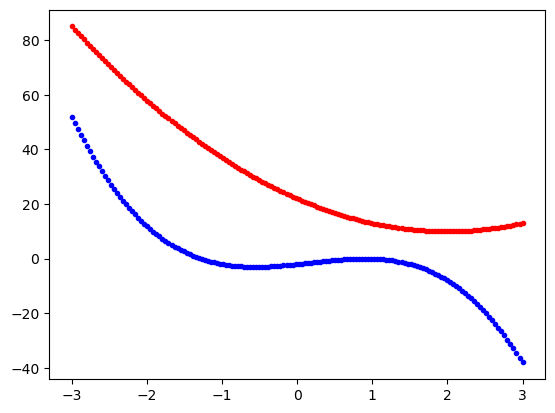

In [3]:
random_high = np.random.uniform(low=-0.3,high=2,size=n_samples)
random_low = np.random.uniform(low=-0.3,high=2,size=n_samples)
x_abs = np.linspace(start=-3,stop=3,num=n_samples)
plt.plot(x_abs,-2*(x_abs)**3+x_abs**2-2+3*x_abs, 'bo', marker='.', color='b')
plt.plot(x_abs,3*(x_abs-2)**2+10, 'bo', marker='.', color='r')

In [4]:
group_high = np.vstack((x_abs,-2*(x_abs)**3+x_abs**2-2+3*x_abs))
group_low = np.vstack((x_abs,3*(x_abs-2)**2+10))
group_high = np.transpose(group_high)
group_low = np.transpose(group_low)
whole_data = np.vstack((group_high,group_low))
whole_data = pd.DataFrame(whole_data)
labels = np.ones(2*n_samples)
for i in range(n_samples):
    labels[i] = -1
    labels[i+n_samples] = 1
whole_data['intercept'] = np.ones(whole_data.shape[0])
whole_data['label'] = labels
whole_data.columns = ['x1','x2','intercept','label']
whole_data_opti = whole_data.to_numpy()

In [5]:
theta = [np.array((30,30,30)),np.array((0.3,0.3,0.3))]
gamma = 0.1
epsilon = 0.001
max_it = 10000

In [6]:
t = 1
compteur = 0
while np.linalg.norm(theta[t] - theta[t-1]) > epsilon and compteur < max_it:
    compteur += 1
    num = np.empty((2*n_samples,3))
    denom = np.empty(2*n_samples)
    for i in range(2*n_samples):
        x_i = whole_data_opti[i,:3]
        y_i = whole_data_opti[i,3]
        num[i,:] = x_i*y_i
        denom[i] = 1 + np.exp(y_i*np.sum(theta[t]*x_i))
    denom = denom.reshape(2*n_samples,1)
    whole_vect = num/denom
    gradient = (-1/(2*n_samples))*np.sum(whole_vect,axis=0)
    theta.append(theta[t] - gamma*gradient)
    t+=1

    

In [7]:
whole_space_y = np.random.uniform(low=-40,high=120,size=10000).reshape(10000,1)
whole_space_x = np.random.uniform(low=-3,high=3,size=10000).reshape(10000,1)
whole_space = np.hstack((whole_space_x,whole_space_y))

In [8]:
labels_test = np.empty(10000)
for i in range(10000):
    labels_test[i] = np.sign(np.sum(theta[-1][:2]*whole_space[i,:]+theta[-1][2]))

In [9]:
test_input = pd.DataFrame(whole_space)
test_input['label'] = labels_test
test_input.columns = ['x1','x2','label']

/tmp/ipykernel_14292/1635825736.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_abs,-2*(x_abs)**3+x_abs**2-2+3*x_abs, 'bo', marker='.', color='b')
/tmp/ipykernel_14292/1635825736.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_abs,-2*(x_abs)**3+x_abs**2-2+3*x_abs, 'bo', marker='.', color='b')
/tmp/ipykernel_14292/1635825736.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_abs,3*(x_abs-2)**2+10, 'bo', marker='.', color='r')
/tmp/ipykernel_14292/1635825736.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take p

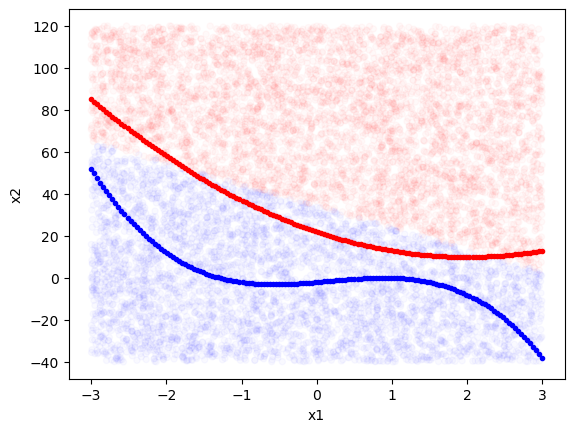

In [10]:
colors = {-1:'blue', 1:'red'}
color_list = [colors[group] for group in test_input['label']]
test_input.plot.scatter('x1','x2', c=color_list,alpha=0.025)
plt.plot(x_abs,-2*(x_abs)**3+x_abs**2-2+3*x_abs, 'bo', marker='.', color='b')
plt.plot(x_abs,3*(x_abs-2)**2+10, 'bo', marker='.', color='r')

<Axes: xlabel='x1', ylabel='x2'>

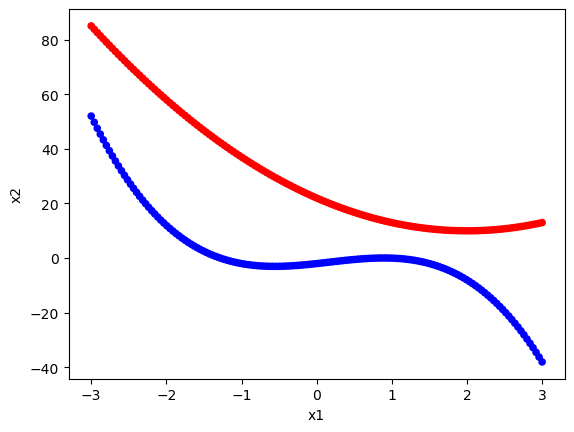

In [11]:
colors = {-1:'blue', 1:'red'}
color_list = [colors[group] for group in whole_data['label']]
whole_data.plot.scatter('x1','x2', c=color_list)

In [12]:
theta_1,theta_2,theta_0 = np.empty(len(theta)),np.empty(len(theta)),np.empty(len(theta))

In [13]:
for i in range(len(theta)):
    theta_1[i] = theta[i][0]
    theta_2[i] = theta[i][1]
    theta_0[i] = theta[i][2]

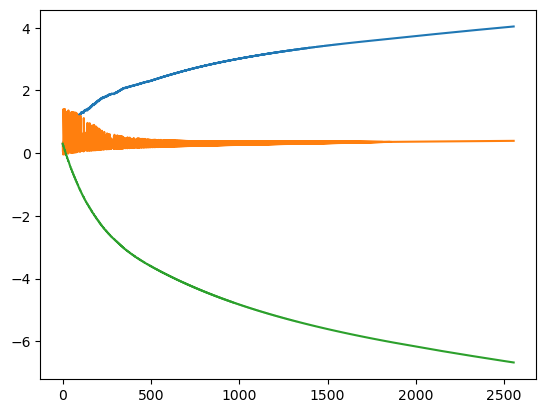

In [14]:
plt.plot(theta_1[1:])
plt.plot(theta_2[1:])
plt.plot(theta_0[1:])